In [24]:
import os
import math
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
BASE_DIR = 'C:/Users/zzy/DL_dataset/lego/star-wars-images/'
names = ["YODA","LUKE SKYWALKER","R2-D2","MACE WINDU","GENERAL GRIEVOUS"]
tf.random.set_seed(1)

下面这步添加了3个文件夹

In [ ]:
if not os.path.isdir(BASE_DIR+'train/'):
    for name in names:
        os.makedirs(BASE_DIR+'train/'+name)
        os.makedirs(BASE_DIR+'val/'+name)
        os.makedirs(BASE_DIR+'test/'+name)

下面这步为以上的三个文件夹分配了图片数据。

In [ ]:
orig_folders = ["0001/","0002/","0003/","0004/","0005/"]
for folder_idx,folder in  enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6)+0.5)
    n_valid = int((number_of_images * 0.25)+0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images,n_train,n_valid,n_test)
    for idx,file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name,BASE_DIR+"train/"+names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name,BASE_DIR+"val/"+names[folder_idx])
        else:
            shutil.move(file_name,BASE_DIR+"test/"+names[folder_idx])

在执行了上面一步操作之后，我删掉了0001等文件

In [26]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/train',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

val_batches = valid_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/val',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = valid_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/test',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 40 images belonging to 5 classes.
Found 19 images belonging to 5 classes.
Found 4 images belonging to 5 classes.


In [27]:
train_batch=train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch=test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[2. 0. 1. 0.]
(4, 256, 256, 3)
[3. 3. 4. 4.]


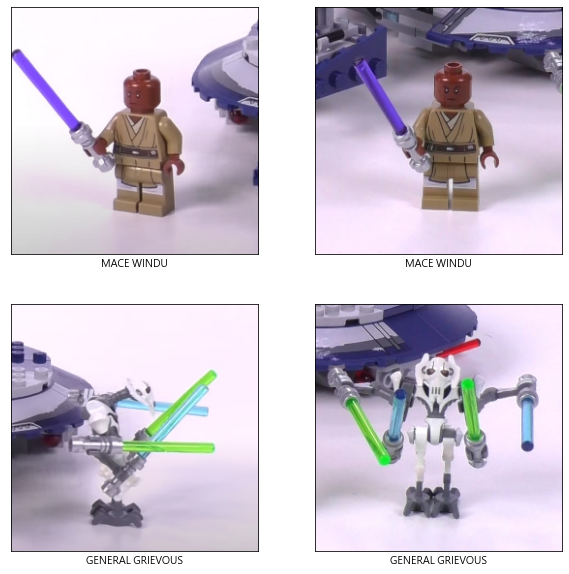

In [28]:
def show(batch,pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i],cmap=plt.cm.binary)
        lbl=names[int(batch[1][i])]
        if pred_labels is not None:
            lbl+="/ Pred:"+names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()
    
show(test_batch)

下面我们来旋转缩放和改变图片的形状并进行测试

In [ ]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                        rotation_range=20,
                                                        horizontal_flip=True,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        shear_range=0.2,
                                                        zoom_range=0.2)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                        rotation_range=20,
                                                        horizontal_flip=True,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        shear_range=0.2,
                                                        zoom_range=0.2)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                       rotation_range=20,
                                                        horizontal_flip=True,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        shear_range=0.2,
                                                        zoom_range=0.2)

train_batches = train_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/train',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

val_batches = valid_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/val',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = valid_gen.flow_from_directory(
    'C:/Users/zzy/DL_dataset/lego/star-wars-images/test',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

In [ ]:
train_batch=train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batches=test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

In [ ]:
def show(batch,pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i],cmap=plt.cm.binary)
        lbl=names[int(batch[1][i])]
        if pred_labels is not None:
            lbl+="/ Pred:"+names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()
    
show(test_batches)

In [29]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(5))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [30]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim=keras.optimizers.Adam(learning_rate=0.001)
metrics=["accuracy"]
model.compile(optimizer=optim,loss=loss,metrics=metrics)

In [32]:
epochs=30
#keras回调
early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)
history = model.fit(
                    train_batches,
                    validation_data=val_batches,
                     callbacks=[early_stopping],
                    epochs=epochs,
                    verbose=2)

Epoch 1/30
10/10 - 1s - loss: 1.2955e-05 - accuracy: 1.0000 - val_loss: 0.9067 - val_accuracy: 0.7895 - 1s/epoch - 148ms/step
Epoch 2/30
10/10 - 1s - loss: 1.1867e-05 - accuracy: 1.0000 - val_loss: 0.9018 - val_accuracy: 0.8421 - 1s/epoch - 143ms/step
Epoch 3/30
10/10 - 1s - loss: 1.1098e-05 - accuracy: 1.0000 - val_loss: 0.8963 - val_accuracy: 0.8421 - 1s/epoch - 144ms/step
Epoch 4/30
10/10 - 2s - loss: 1.0395e-05 - accuracy: 1.0000 - val_loss: 0.8909 - val_accuracy: 0.8421 - 2s/epoch - 156ms/step
Epoch 5/30
10/10 - 2s - loss: 9.6498e-06 - accuracy: 1.0000 - val_loss: 0.8900 - val_accuracy: 0.8421 - 2s/epoch - 157ms/step
Epoch 6/30
10/10 - 2s - loss: 9.0657e-06 - accuracy: 1.0000 - val_loss: 0.8860 - val_accuracy: 0.8421 - 2s/epoch - 156ms/step
Epoch 7/30
10/10 - 1s - loss: 8.5829e-06 - accuracy: 1.0000 - val_loss: 0.8896 - val_accuracy: 0.8421 - 1s/epoch - 143ms/step
Epoch 8/30
10/10 - 2s - loss: 8.0316e-06 - accuracy: 1.0000 - val_loss: 0.8898 - val_accuracy: 0.8421 - 2s/epoch - 156

In [34]:
model.save("lego_model.h5")

绘出损失和准确率

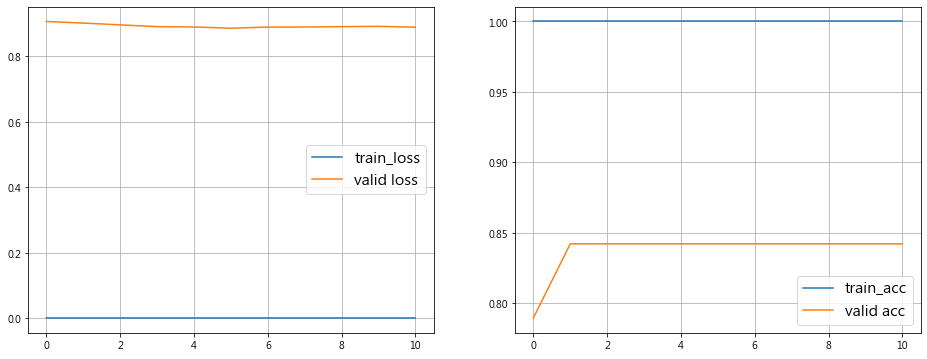

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='valid acc')
plt.grid()
plt.legend(fontsize=15)

评估模型

In [36]:
model.evaluate(test_batches,verbose=2)

1/1 - 0s - loss: 7.1525e-07 - accuracy: 1.0000 - 66ms/epoch - 66ms/step


[7.15254714123148e-07, 1.0]

In [37]:
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions,axis=1)
print(test_batches[0][1])#这是实际值
print(labels[0:4])#这是预测值

[3. 3. 4. 4.]
[3 3 4 4]


准确度非常高

打印一下真实和图像

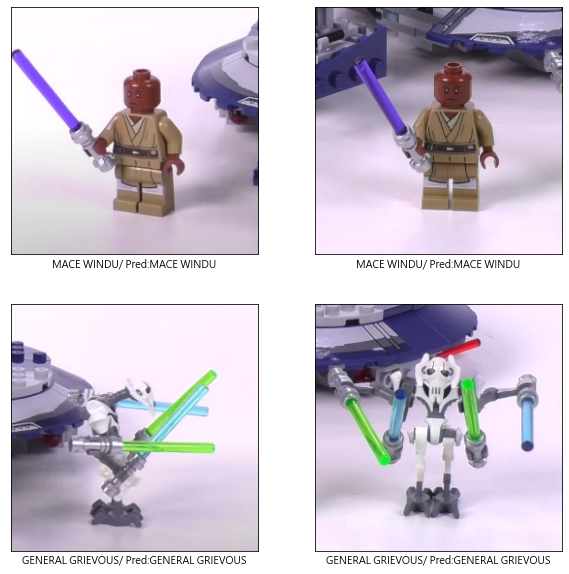

In [38]:
show(test_batches[0],labels[0:4])